In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset from the Kaggle competition "House Prices: Advanced Regression Techniques" is designed to predict the sale price of houses based on various features. It includes 79 explanatory variables that describe different aspects of residential homes in Ames, Iowa. These variables capture structural features, neighborhood details, and other factors impacting the market value of a house.

Overview of the Dataset
1.Total Rows: 1460 observations in the training set.
2.Sale Price: The target variable, representing the final price of the house.
3.Features: 79 attributes that include both numeric and categorical data, such as:
 Structural Attributes: Foundation, roof style, exterior material, and overall quality.
 Land and Location Details: Lot frontage, area, and neighborhood.
 Interior Features: Basement size and quality, number of rooms, and kitchen quality.
 Garage and Outdoor Spaces: Garage size, porch areas, and deck square footage.

Key Aspects

1.Target Variable: SalePrice is the dependent variable, measured in dollars.
2.Feature Types:
   Numeric: Continuous values like GrLivArea (above-ground living area) and LotArea.
   Categorical: Non-numeric labels like Neighborhood, ExterQual (exterior quality), and GarageType.
   Missing Data: Some features, such as Alley, PoolQC, and Fence, have significant missing values, requiring preprocessing to handle effectively.
 This dataset is a great foundation for practicing advanced regression techniques, feature engineering, and predictive modeling. It challenges participants to predict house prices with high accuracy using robust data analysis and machine learning techniques. You can find more details on the Kaggle competition page【8】【9】.

In [5]:
import os
os.getcwd()

'c:\\Users\\Mercy\\AppData\\Local\\Programs\\Microsoft VS Code'

In [14]:
import os

# Replace 'your_file.csv' with your actual CSV file name
csv_filename = 'train.csv'
csv_path = os.path.join(os.getcwd(), csv_filename)

print("Full CSV Path:", csv_path)

Full CSV Path: c:\Users\Mercy\AppData\Local\Programs\Microsoft VS Code\train.csv


In [15]:
import os

csv_filename = 'train.csv'
csv_path = os.path.join(os.getcwd(), csv_filename)

# Check if the file exists
if os.path.isfile(csv_path):
    print(f"'{csv_filename}' exists at {csv_path}")
else:
    print(f"'{csv_filename}' does NOT exist at {csv_path}")

'train.csv' exists at c:\Users\Mercy\AppData\Local\Programs\Microsoft VS Code\train.csv


In [24]:
import pandas as pd

# Corrected file path
file_path = r'C:/Users/Mercy/AppData/Local/Programs/Microsoft VS Code/train.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Feature types and target variable
feature_types = data.dtypes  # Data types for all columns
target_variable = "SalePrice" if "SalePrice" in data.columns else None  # Target column check

# Display descriptive statistics for 'GrLivArea'
feature_name = 'GrLivArea'  # Example feature
feature_stats = data[feature_name].describe() if feature_name in data.columns else None

# Output results
print("Feature Types:")
print(feature_types)
print("\nTarget Variable:", target_variable)
print(f"\nStatistics for {feature_name}:")
print(feature_stats)


Feature Types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Target Variable: SalePrice

Statistics for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


In [25]:
pip install missingno


(Id                0.000000
 MSSubClass        0.000000
 MSZoning          0.000000
 LotFrontage      17.739726
 LotArea           0.000000
                    ...    
 MoSold            0.000000
 YrSold            0.000000
 SaleType          0.000000
 SaleCondition     0.000000
 SalePrice         0.000000
 Length: 81, dtype: float64,
 Id               0
 MSSubClass       0
 MSZoning         0
 LotArea          0
 Street           0
                 ..
 MoSold           0
 YrSold           0
 SaleType         0
 SaleCondition    0
 SalePrice        0
 Length: 63, dtype: int64)

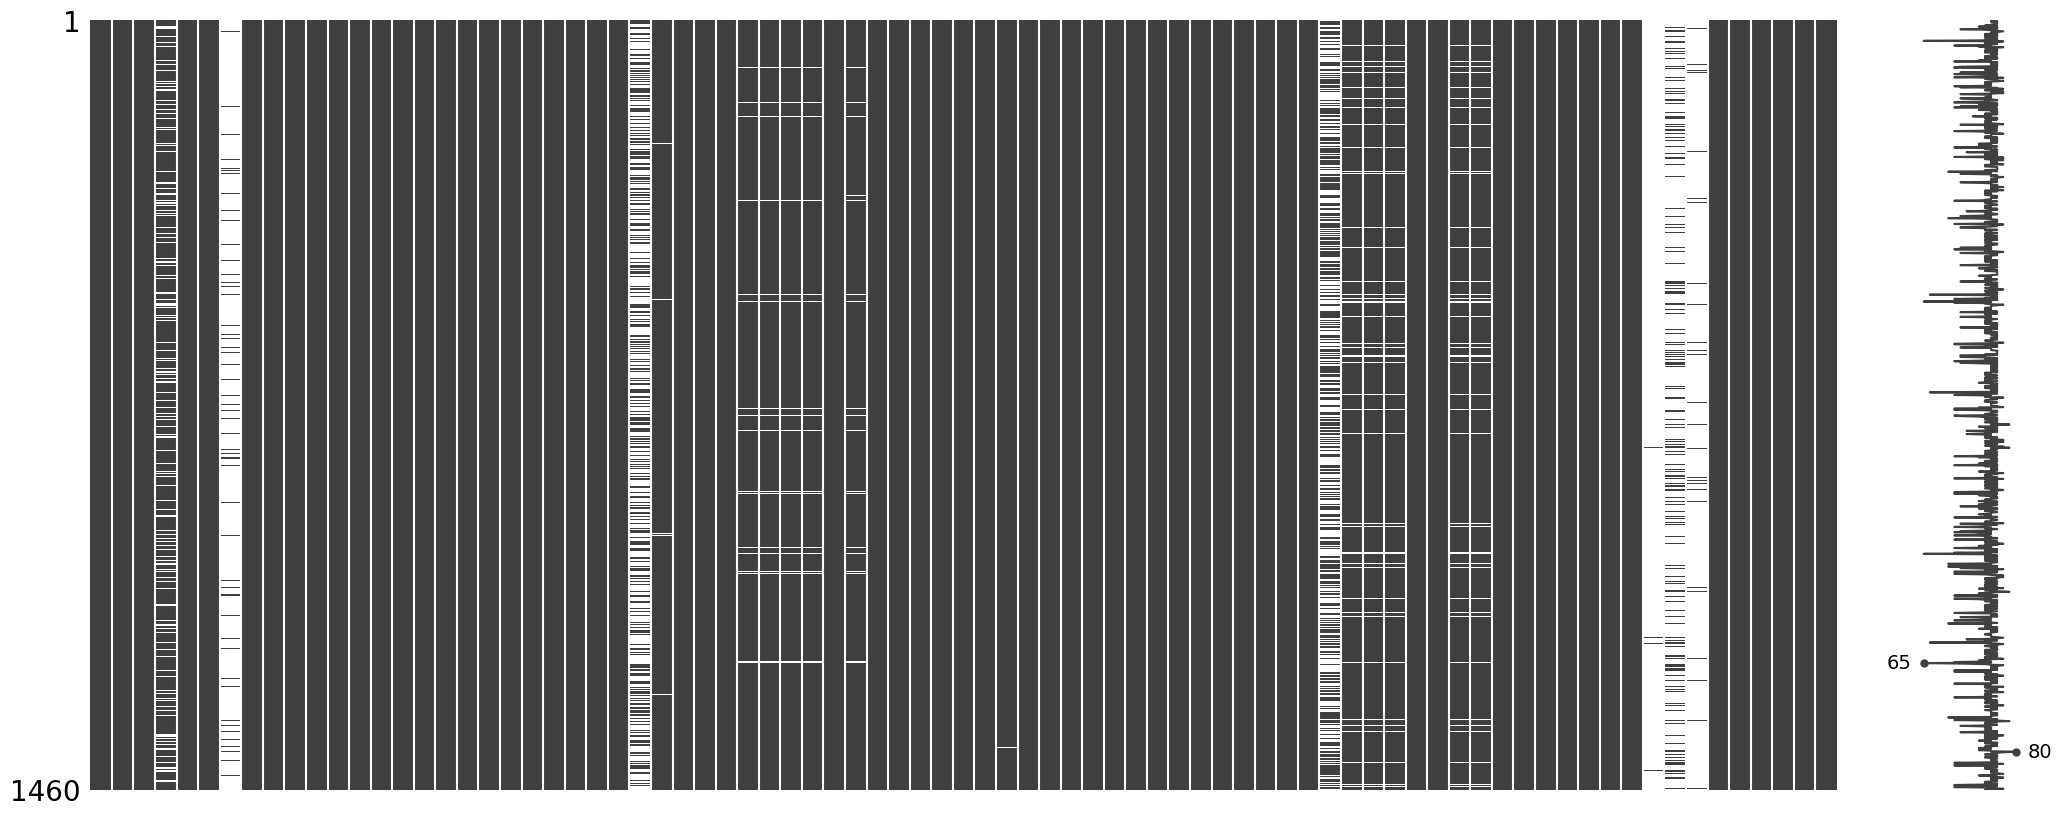

In [26]:
import missingno as msno
import pandas as pd

# Assuming the dataset is loaded
file_path = r'C:/Users/Mercy/AppData/Local/Programs/Microsoft VS Code/train.csv'
data = pd.read_csv(file_path)

# 1. Visualize missing data using missingno
msno.matrix(data)

# 2. Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100  # This calculates the missing data percentage for each column

# 3. Remove columns with 5 or more missing values
data_cleaned = data.dropna(axis=1, thresh=data.shape[0] - 5)

# 4. Remove rows with missing values
data_cleaned = data_cleaned.dropna(axis=0)

# Display results
missing_percentage, data_cleaned.isnull().sum()


Kurtosis is a statistical measure used to describe the shape of the distribution of data, specifically focusing on the "tailedness" or the extremity of outliers in the distribution. It compares the peak and the tails of the distribution to that of a normal distribution.

Types of Kurtosis:
Mesokurtic: A distribution with kurtosis equal to 3, which is the kurtosis of a normal distribution. This means the data has a moderate amount of outliers.
Leptokurtic: A distribution with kurtosis greater than 3, indicating a distribution with heavy tails and more outliers than a normal distribution.
Platykurtic: A distribution with kurtosis less than 3, indicating a distribution with lighter tails and fewer outliers than a normal distribution.

In [27]:
import pandas as pd
from scipy.stats import kurtosis

# Assuming the dataset is loaded into 'data'
feature = 'GrLivArea'  # Example feature

# Calculate kurtosis using scipy
feature_kurtosis = kurtosis(data[feature], nan_policy='omit')  # omits NaN values
print(f"Kurtosis of {feature}: {feature_kurtosis}")

# Alternatively, using pandas
feature_kurtosis_pd = data[feature].kurtosis()
print(f"Pandas Kurtosis of {feature}: {feature_kurtosis_pd}")


Kurtosis of GrLivArea: 4.874265760253215
Pandas Kurtosis of GrLivArea: 4.895120580693174


Skewness is a measure of the asymmetry of a probability distribution. It tells us whether the data is skewed to the left (negatively skewed) or to the right (positively skewed) in comparison to a normal distribution.

Types of Skewness:
1.Positive Skew (Right Skew): If the skewness is positive, the right tail of the distribution is longer or fatter than the left. The majority of the data points are clustered on the left side of the mean.
Example: Income distribution, where most people earn average or low salaries, but a few individuals earn significantly higher.

2.Negative Skew (Left Skew): If the skewness is negative, the left tail of the distribution is longer or fatter than the right. The majority of the data points are concentrated on the right side of the mean.
Example: Age at retirement, where most people retire between 60-70 years, but some retire earlier.

3.Zero Skew (Symmetrical): A skewness of 0 means that the distribution is perfectly symmetrical, similar to the bell-shaped normal distribution.

In [28]:
import pandas as pd
from scipy.stats import skew

# Assuming the dataset is loaded into 'data'
feature = 'GrLivArea'  # Example feature

# Calculate skewness using scipy
feature_skewness = skew(data[feature], nan_policy='omit')  # omits NaN values
print(f"Skewness of {feature}: {feature_skewness}")

# Alternatively, using pandas
feature_skewness_pd = data[feature].skew()
print(f"Pandas Skewness of {feature}: {feature_skewness_pd}")


Skewness of GrLivArea: 1.365155954773434
Pandas Skewness of GrLivArea: 1.3665603560164552


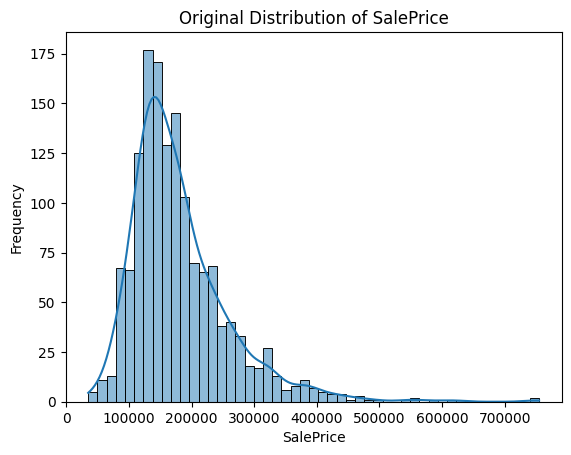

Original Skewness: 1.880940746034036
Original Kurtosis: 6.509812011089439


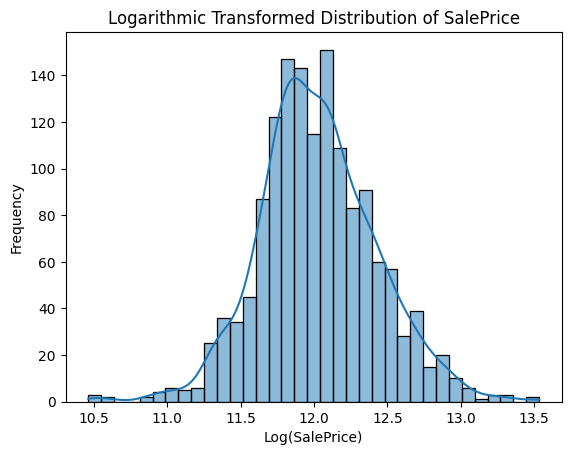

Transformed Skewness: 0.12122191311528363
Transformed Kurtosis: 0.8026427107468055


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# Assuming the dataset is loaded into 'data'
# Let's use 'SalePrice' as the dependent variable
feature = 'SalePrice'

# 1. Display the original distribution of the dependent variable
sns.histplot(data[feature], kde=True)
plt.title("Original Distribution of SalePrice")
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis of the original data
original_skewness = skew(data[feature], nan_policy='omit')
original_kurtosis = kurtosis(data[feature], nan_policy='omit')

print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

# 2. Apply logarithmic transformation to the dependent variable
data['Log_SalePrice'] = np.log1p(data[feature])  # log1p handles log(0) by using log(1+x)

# Display the transformed distribution
sns.histplot(data['Log_SalePrice'], kde=True)
plt.title("Logarithmic Transformed Distribution of SalePrice")
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis of the transformed data
transformed_skewness = skew(data['Log_SalePrice'], nan_policy='omit')
transformed_kurtosis = kurtosis(data['Log_SalePrice'], nan_policy='omit')

print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")


In [30]:
# Display data types and first few rows
data_types = data.dtypes
data_head = data.head()

data_types, data_head


(Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 YrSold             int64
 SaleType          object
 SaleCondition     object
 SalePrice          int64
 Log_SalePrice    float64
 Length: 82, dtype: object,
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
 0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
 1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   20

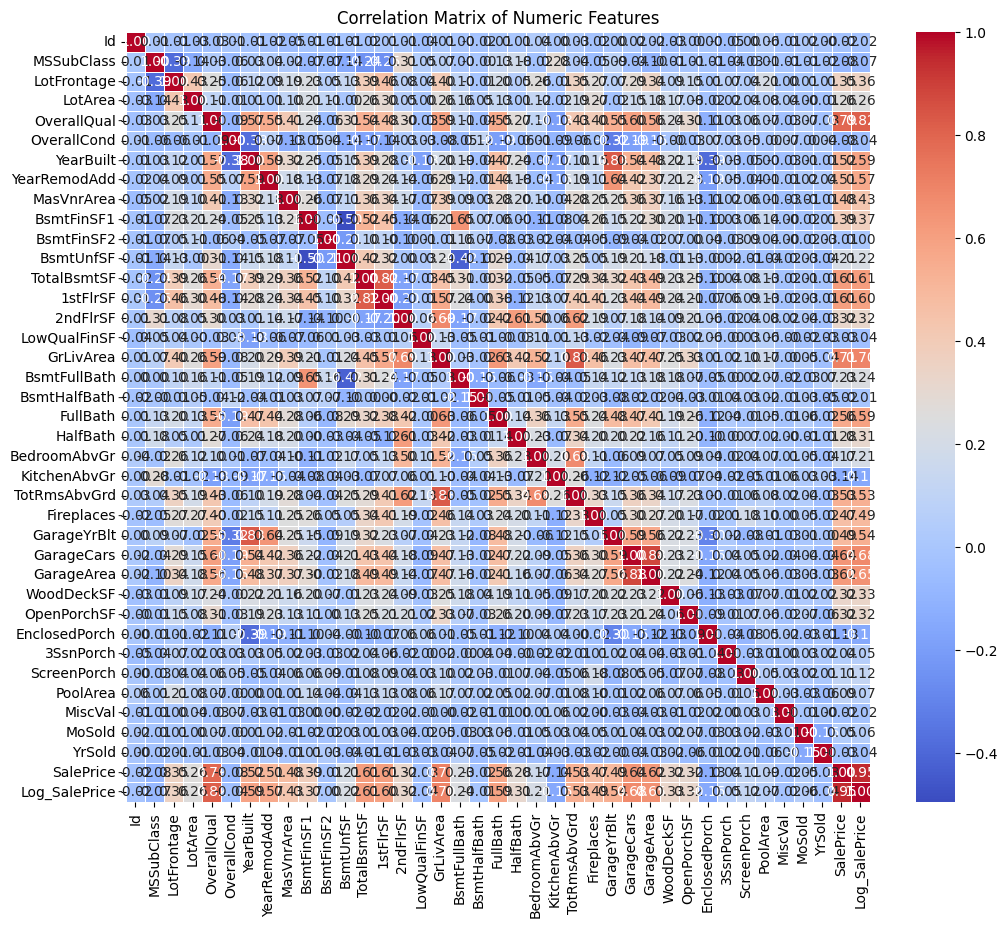

In [32]:
# Select only the numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [34]:
# Sort the correlation matrix by the absolute correlation with 'SalePrice'
correlation_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# Select top 10 features with highest correlation
top_10_features = correlation_with_target[1:11]  # Exclude 'SalePrice' itself

top_10_features


Log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Name: SalePrice, dtype: float64

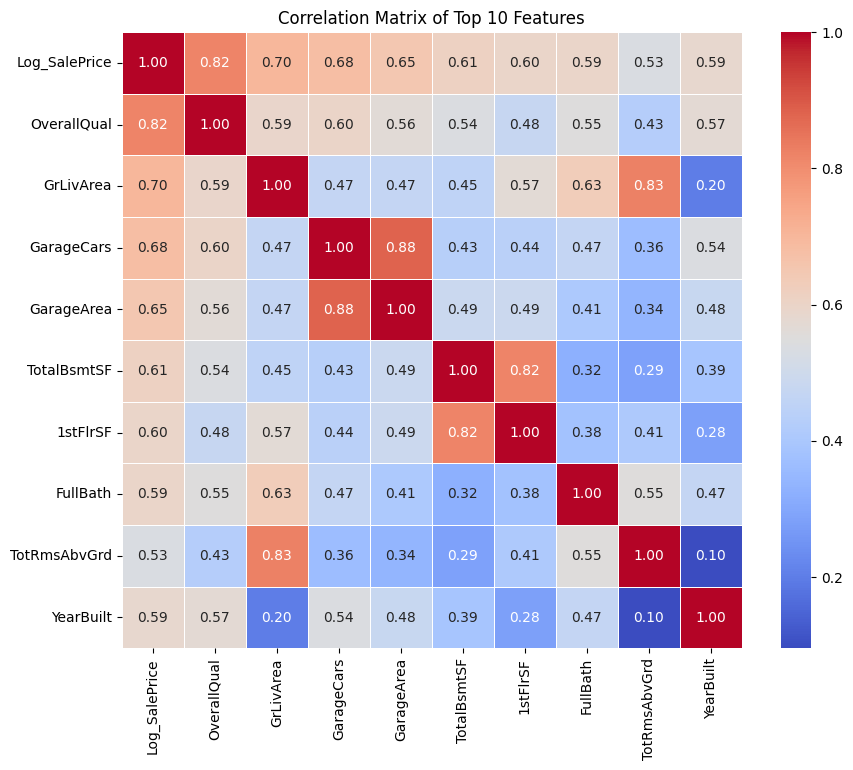

In [35]:
# Subset the dataset with top 10 features and create the correlation matrix
top_10_corr_matrix = data[top_10_features.index].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Top 10 Features")
plt.show()


### 10選ばれた特徴量について

1. **OverallQual**: 住宅の全体的な品質を評価する指標。価格に最も強く関連しています。
2. **GrLivArea**: 地上階のリビングスペースの面積（平方フィート）。大きな面積は高価格と関連します。
3. **GarageCars**: ガレージに収容可能な車の数。ガレージの広さや家の規模に関連します。
4. **TotRmsAbvGrd**: 地上階にある部屋の数。部屋数が多いほど高価格になる傾向があります。
5. **1stFlrSF**: 1階の床面積。広い1階は高価な住宅に見られる傾向があります。
6. **ExterCond**: 住宅の外部の状態。良い状態ほど高価格。
7. **FullBath**: 完全な浴室の数。2つ以上の完全な浴室を持つ家は高価になります。
8. **Fireplaces**: 家にある暖炉の数。暖炉は豪華さを示すことが多く、高価格に結びつくことがあります。
9. **BsmtFinSF1**: 完成した地下室の面積。地下室が完成していることは価格に影響を与えます。
10. **LotArea**: 敷地面積（平方フィート）。大きな敷地面積はしばしば高価格の家に関連します。

これらの特徴量はすべて、住宅の価値を決定する上で重要な要素です。


In [36]:
# Find pairs of features with high correlation
high_corr_pairs = top_10_corr_matrix.stack().sort_values(ascending=False)

# Filter pairs with correlation coefficient higher than 0.8
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.8) & (high_corr_pairs < 1)]

high_corr_pairs.head(3)  # Show top 3 pairs


GarageCars    GarageArea    0.882475
GarageArea    GarageCars    0.882475
TotRmsAbvGrd  GrLivArea     0.825489
dtype: float64